## FFT

A fast algorithm to calculate the DFT

$$
X[k] = \sum_{n=0}^{N-1}x[n]e^{-j2\pi kn/N}
$$
$$
x[n] = \frac{1}{2\pi}\sum_{k=0}^{N-1}X[k]e^{j2\pi kn/N}
$$
$my\_fft$ gets the original signal and the sampling rate as input and outputs the frequency and corresponding mag which is a complex number. The length of the frequency is the half of the fs.

$my\_ifft$ gets the mag of the $my\_fft$ as input and outputs the original signal.

The basic function of the fft is orthogonal. Why orthogonal is important? Because it can help us determine the cofficient conveniently. We can only multiple the signal and the basic function to get the cofficient of the basic funtion.

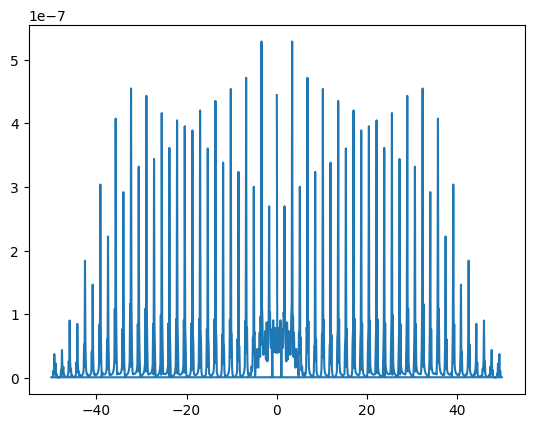

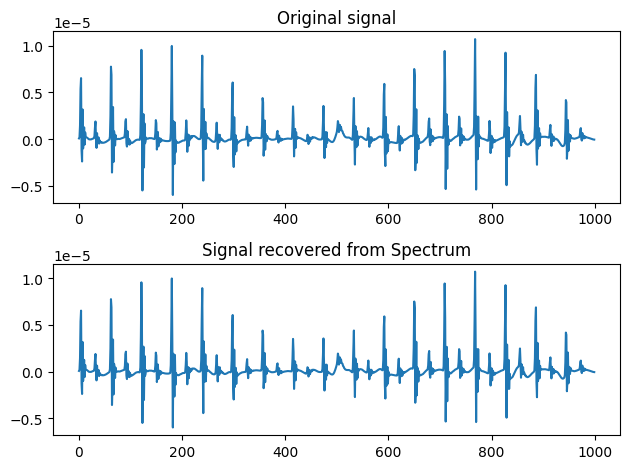

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from dsp import my_fft, my_ifft

signal = np.load("./data/sim_100_0.1_90_140_train.npy")[1,:1000]
fs = 100

freq, mag = my_fft(signal, fs)
plt.plot(freq, np.abs(mag))
plt.show()

signal_recovered = my_ifft(mag)

fig, axis = plt.subplots(2,1)
axis[0].set_title("Original signal")
axis[0].plot(signal)

axis[1].set_title("Signal recovered from Spectrum")
axis[1].plot(signal_recovered.real)
plt.tight_layout()
plt.show()

## Analytic Signal and Hilbert Transformation

Fourier Transform of a real-valued signal is complex-symmetric whose negative frequencies are redundant with respect to the positive frequencies. To remove the redundancy, the analytic signal is invented. It is complex-valued but its spectrum will be one-sided (only positive frequencies) that preserved the spectral content of the original real-valued signal. Using an analytic signal instead of the original real-valued signal, is useful in many signal processing applications. For example, in spectral analysis, use of analytic signal in-lieu of the original real-valued signal mitigates estimation biases and eliminates cross-term artifacts due to negative and positive frequency components.

In the frequency domain, the analytic signal has only the postive part of the original signal and the magnitude is two times of the orignal postive spectrum. In the time domain, the real part of the analytic signal is the same as the original signal, but it has a imaginary part. $z(t)$ denotes the time domain analytic singal, and $x(t)$ denotes the original signal.
$$
z(t) = z_{r}(t) + z_{i}(t) = x(t) + z_{i}(t)
$$
So what's the imaginary part? Hilbert Transformation can be used to find the imaginary part of the orignal real-valude signal.
$$
z(t) = z_{r}(t) + z_{i}(t) = x(t) + jHT\{x(t)\}
$$
$$
HT\{x(t)\} = x(t) * \frac{1}{\pi t} \longleftrightarrow F(f)[-jsgn(f)] = \begin{cases}-jF(f) & f > 0 \\ jF(f) & f< 0 \end{cases}
$$
We can take the hilbert transformation as a filter whose impulse response is $\frac{1}{\pi t}$. And the HT\{x(t)\} has some properties.
1. HT\{HT\{x(t)\}\} = -x(t)
2. HT\{x(t)\} has the opposite parity of x(t)
3. HT\{x(t)\} and x(t) are orthogonal

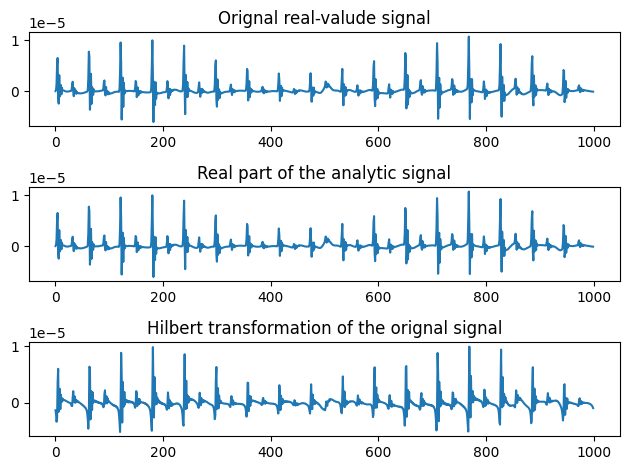

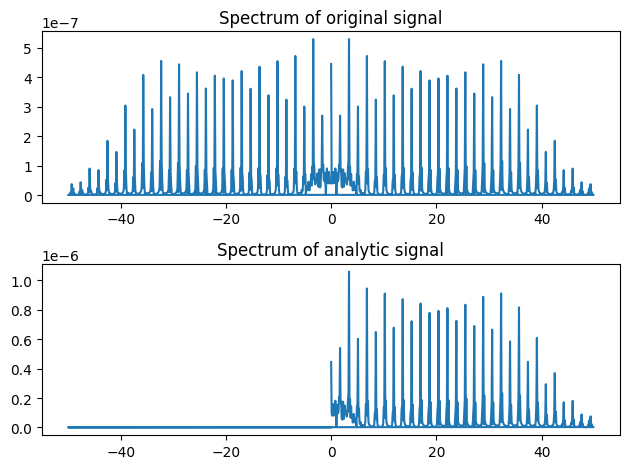

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from dsp import analytic_signal, hilbert_transform

signal = np.load("./data/sim_100_0.1_90_140_train.npy")[1,:1000]
z = analytic_signal(signal)

fig, axis = plt.subplots(3,1)
axis[0].set_title("Orignal real-valude signal")
axis[0].plot(signal)

axis[1].set_title("Real part of the analytic signal")
axis[1].plot(z.real)

axis[2].set_title("Hilbert transformation of the orignal signal")
axis[2].plot(hilbert_transform(signal))
plt.tight_layout()
plt.show()

freq_original, mag_original = my_fft(signal, 100)
freq_analytic, mag_analytic = my_fft(z, 100)

fig, axis = plt.subplots(2,1)
axis[0].set_title("Spectrum of original signal")
axis[0].plot(freq_original, np.abs(mag_original))

axis[1].set_title("Spectrum of analytic signal")
axis[1].plot(freq_analytic, np.abs(mag_analytic))

plt.tight_layout()
plt.show()

## Extract envelope, phase using Hilbert transform

If a modulated signal is expressed as $x(t) = a(t) cos[ \phi (t)]$

The instantaneous amplitude or the envelope of the signal is given by $a(t)$

The instantaneous phase is given by  $\phi(t)$

The instantaneous angular frequency is derived as $\omega(t) = \frac{d}{dt} \phi(t)$

The instantaneous temporal frequency is derived as $f(t) = \frac{1}{2 \pi} \frac{d}{dt} \phi(t)$

We note that the modulated signal is a real-valued signal. We also take note of the fact that amplitude/phase and frequency can be easily computed if the signal is expressed in complex form. So we can use Hilbert transformation to transform the real-valued signal to a complex version.

The analytic signal is 
$$
z(t) = z_{r}(t) + z_{i}(t) = x(t) + jHT\{x(t)\}
$$
So
$$
a(t) = |z(t)| = \sqrt{z_r^2(t) + z_i^2(t)} 
$$
$$
\phi(t) = \angle z(t) = arctan \left[ \frac{z_i(t)}{z_r(t)} \right] 
$$
$$
f(t) = \frac{1}{2 \pi} \frac{d}{dt} \phi(t) 
$$

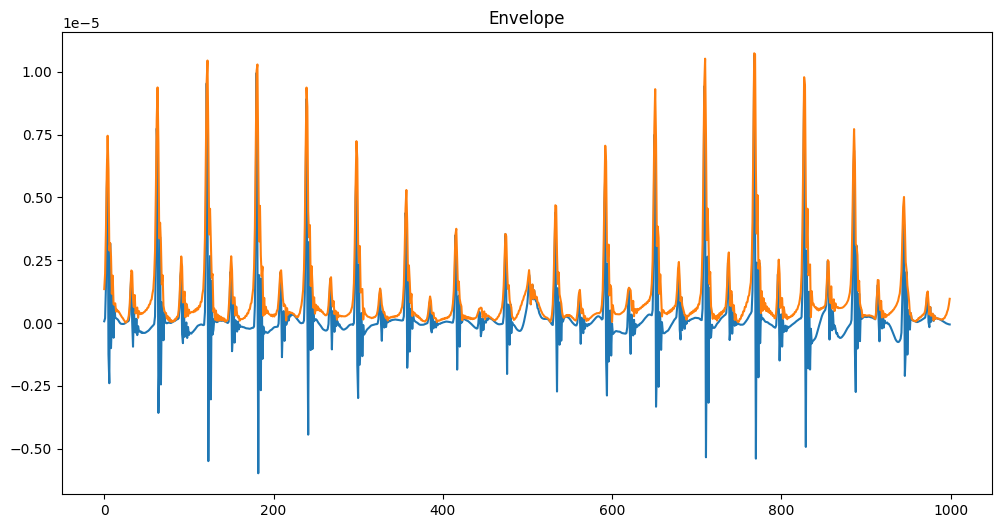

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dsp import inst_amplitude, inst_phase, inst_freq

signal = np.load("./data/sim_100_0.1_90_140_train.npy")[1,:1000]

plt.figure(figsize=(12, 6))
plt.title("Envelope")
plt.plot(signal)
plt.plot(inst_amplitude(signal))
plt.show()

## Petrosian Fractal Dimension (PFD)

Petrosian Fractal Dimension (PFD) is a method used to measure the complexity of time-series signals, particularly applicable in biomedical signals such as electrocardiograms (ECG). It calculates the fractal dimension of a signal to describe its complexity and irregularity. A higher Petrosian Fractal Dimension value indicates a more complex signal.
$$
PFD = \frac{\log_{10}(N)}{\log_{10}(N) + \log_{10}\left(\frac{N}{N + 0.4N_{\text{zc}}}\right)}
$$
where $N$ is the length of the signal and $N_{zc}$ is the number of zero crossings in the signal derivative..

In [1]:
import numpy as np
from dsp import get_template, pfd
import matplotlib.pyplot as plt

signal = np.load("./data/sim_100_0.1_90_140_train.npy")[1,:1000]
template = get_template(signal)

print(pfd(template))

1.0352987947182408


## Short Time Fourier Transformation (STFT)

To get the time information of the signal, we segment the signal and view the signal in the segment as stationary signal. However, when the signal does not complete an integer number of cycles, an issue known as Frequency Leakage may occur which can pose challenges in reconstructing the original signal based on the spectrum. To minimize the impact of Frequency Leakage, the original signal can be multiplied by a window function. After framing, we get many framed segment. Then we do the DFT to get frequency information of each frame. The scale of y axis is frequency. Then we concatenate the spectrum horizontally to get the spectrogram. The spectrogram has both the frequency and time frequency of a signal.

The longer the frame, the frequency information is more accurate, the time information is less accurate. The above is what we call heisenberg uncertainty principle.

The output of the stft is y-axis (frequency), x-axis (time) and the value of each point (magnitude). The max number of y-axis (frequency) is the half of the fs which is based on the Nyquist sampling princple, but the number of frequency in y-axis is the half of the nperseg. The number of the x-axis depends on the nperseg and the noverlap and the max number of the x-axis is (length of signal / fs). The output Z is complex-valued.

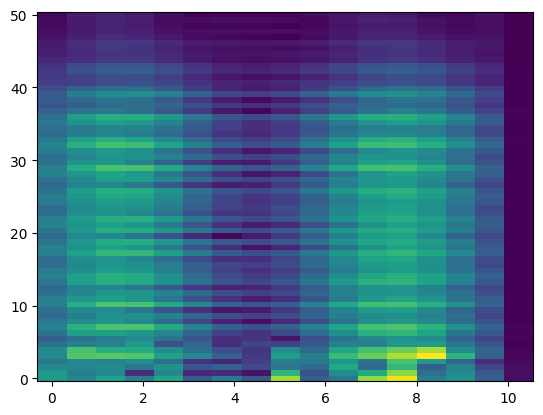

In [3]:
import numpy as np
from dsp import my_stft



signal = np.load("./data/sim_100_0.1_90_140_train.npy")[1,:1000]

fs = 100 # sampling frequency
window = 'hann' # window type
nperseg = 128 # length of frame

# STFT
f, t, Z = my_stft(signal, plot=True, fs=fs, window=window, nperseg=nperseg)

## Wavelet analysis

STFT has a serious problem, that is we can't get a good time and frequency resolution. The bigger the nperseg, the better the frequency resolution, but the worse time resolution, vice versa. The above problem is caused by the fact that the nperseg is fixed. So we introduce the wavelet analysis which is a MRA method. MRA (multiresolution analysis) is designed to give good time resolution and poor frequency resolution at high frequencies and good frequency resolution and poor time resolution at low frequencies.Generally, the basic function of wavelet transform is orthogonal and normalized (normalized makes the transformed signal have the same energy at every scale).

### Mexican Hat wavelet

It is the second derivative of the Gaussian function.

Gaussian function:
$$
w(t) = \frac{1}{\sqrt{2\pi} \cdot \sigma} e^{\frac{-t^2}{2 \sigma^2}}
$$

Second derivative of the Gaussian function:
$$
\psi(t) = \frac{1}{\sqrt{2 \pi} \cdot \sigma^3} \left( e^{\frac{-t^2}{2 \sigma^2}} \cdot \left( \frac{t^2}{\sigma^2} - 1 \right) \right)
$$

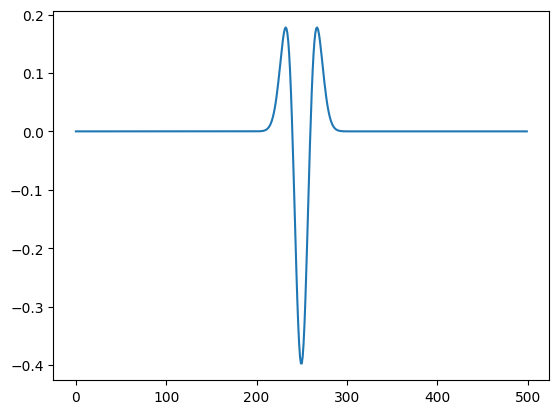

In [3]:
import matplotlib.pyplot as plt
from dsp import mexican_hat_wavelet

sigma = 1
length = 50
psi = mexican_hat_wavelet(sigma, length)
plt.plot(psi)
plt.show()

### Morlet wavelet 

It is defined as follows:
$$
w(t) = e^{i a t} \cdot e^{-\frac{t^2}{2\sigma}}
$$

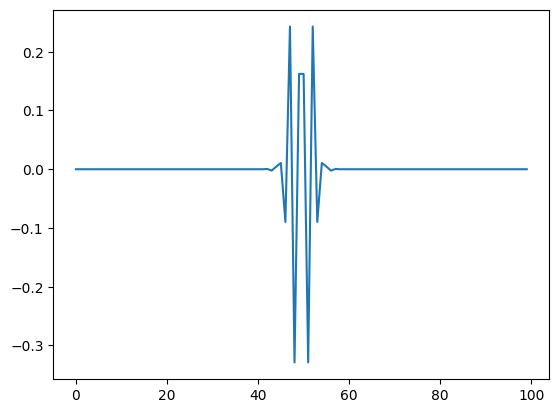

In [3]:
import matplotlib.pyplot as plt
from dsp import morlet_wavelet

length = 100
sigma = 2
a = 5
omega = morlet_wavelet(length, sigma, a)
plt.plot(omega.real)
plt.show()

## Continues Wavelet Transform （CWT）

In CWT, the signal can be transformed by:

$$
CWT_x^\psi(\tau,s) = \Psi_x^\psi(\tau,s) = \frac{1}{\sqrt{|s|}} \int x(t) \psi^* \left( \frac{t - \tau}{s} \right) dt
$$

where the $\tau$ and $s$ are incremented continuously. However, if this transform needs to be computed by a computer, then both parameters are increased by a sufficiently small step size. This corresponds to sampling the time-scale plane.

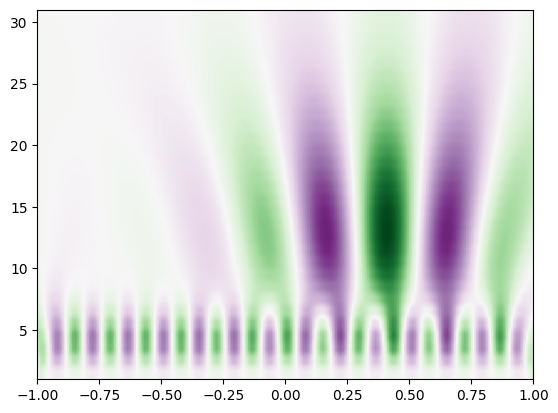

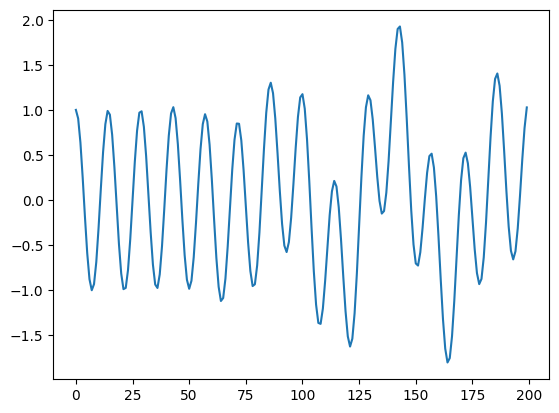

[[0.12295729 0.82403097 0.49659403 ... 0.03778416 0.41158457 0.88748015]
 [0.69769974 1.43730443 1.60158153 ... 0.61310832 1.30673555 1.37748468]
 [1.34653365 1.81454133 1.83427207 ... 0.48377523 1.18359425 1.40976794]
 ...
 [0.09547932 0.08849822 0.08116842 ... 0.30182776 0.35401421 0.40324284]
 [0.0902296  0.08113826 0.07175717 ... 0.23613821 0.28545125 0.33304506]
 [0.08276783 0.07114499 0.05934224 ... 0.18429729 0.23045273 0.27607165]]


In [4]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)
widths = np.arange(1, 31)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
cwtmatr_yflip = np.flipud(cwtmatr)
plt.imshow(cwtmatr_yflip, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()
plt.plot(sig)
plt.show()
print(cwtmatr)

## Inverse CWT

$$
x(t)=\frac{1}{c_{\psi}^{2}} \int_{s} \int_{\tau} \Psi_{x}^{\psi}(\tau, s) \frac{1}{s^{2}} \psi\left(\frac{t-\tau}{s}\right) d \tau d s
$$

where \c_{\psi} is a constant that depends on the wavelet used. It can be calculated as follows:
$$
c_{\psi}=\left\{2 \pi \int_{-\infty}^{\infty} \frac{|\hat{\psi}(\xi)|^{2}}{|\xi|} d \xi\right\}^{1 / 2}
$$

where $\hat{\psi(\xi)}$ is the FT of $\psi(t)$

In [12]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

f = pywt.scale2frequency("gaus1", scale)/sampling_period

x = np.arange(512)
y = np.sin(2*np.pi*x/32)
y = np.append(y,np.sin(2*np.pi*x/64))
plt.plot(y)
plt.show()
coef, freqs=pywt.cwt(y,np.arange(1,129),'gaus1')
print(coef.shape)
print(freqs.shape)
plt.matshow(coef) 
plt.show() 

NameError: name 'scale' is not defined